# Chapter 9: Regression Models
# By: Parisa Hormozzadeh
Regression involves predicting continuous numerical values from input data.

---

## Regression Models in This Notebook
- **Linear Regression:** Simple and interpretable model fitting a line.
- **K-Nearest Neighbors Regression:** Predicts average of neighbors' targets.
- **Decision Tree Regression:** Tree-based model splitting data for prediction.

---

## Preparing Data for Regression
- Features (X) and continuous target (y)
- Train-test split

---

# 1. Load Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_set = pd.read_csv('power_consumption.csv')
data_set

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerDemandCategory
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,Low
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,Low
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,Low
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,Low
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,Low
...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,High
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,Low
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,Low
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,Low


In [21]:
data_set.isnull().sum()

Datetime                     0
Temperature               2096
Humidity                     0
WindSpeed                   50
GeneralDiffuseFlows          0
DiffuseFlows                 0
PowerConsumption_Zone1       0
PowerDemandCategory          0
dtype: int64

# 2. Preprocessing 

## 2.1. Feature Engineering

Transforming Datetime into usable features.

In [22]:
data_set['Datetime'] = pd.to_datetime(data_set['Datetime'])

# Extract hour, day of the week, month
data_set['Hour'] = data_set['Datetime'].dt.hour
data_set['DayOfWeek'] = data_set['Datetime'].dt.dayofweek
data_set['Month'] = data_set['Datetime'].dt.month
data_set

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerDemandCategory,Hour,DayOfWeek,Month
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,Low,0,6,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,Low,0,6,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,Low,0,6,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,Low,0,6,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,Low,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,High,23,5,12
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,Low,23,5,12
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,Low,23,5,12
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,Low,23,5,12


In [23]:
data_set['IsWeekend'] = data_set['DayOfWeek'].isin([5, 6]).astype(int)
data_set = data_set.drop('Datetime' , axis=1)

data_set

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerDemandCategory,Hour,DayOfWeek,Month,IsWeekend
0,6.559,73.8,0.083,0.051,0.119,34055.69620,Low,0,6,1,1
1,6.414,74.5,0.083,0.070,0.085,29814.68354,Low,0,6,1,1
2,6.313,74.5,0.080,0.062,0.100,29128.10127,Low,0,6,1,1
3,6.121,75.0,0.083,0.091,0.096,28228.86076,Low,0,6,1,1
4,5.921,75.7,0.081,0.048,0.085,27335.69620,Low,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,High,23,5,12,1
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,Low,23,5,12,1
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,Low,23,5,12,1
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,Low,23,5,12,1


## 2.2. Train & Test

In [24]:
X = data_set.drop(columns=['PowerConsumption_Zone1']) 
y = data_set['PowerConsumption_Zone1']
y 

0        34055.69620
1        29814.68354
2        29128.10127
3        28228.86076
4        27335.69620
            ...     
52411    31160.45627
52412    30430.41825
52413    29590.87452
52414    28958.17490
52415    28349.80989
Name: PowerConsumption_Zone1, Length: 52416, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

X_train_non, X_test_non, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set size:", len(X_train_non))
print("Test set size:", len(X_test_non))

Train set size: 41932
Test set size: 10484


## 2.3. Handling Missing Values

In [26]:
mean_values_Temperature = X_train_non['Temperature'].mean()
min_values_WindSpeed = X_train_non['WindSpeed'].min()

X_train_non['Temperature'] =  X_train_non['Temperature'].fillna(mean_values_Temperature)
X_train_non['WindSpeed'] =  X_train_non['WindSpeed'].fillna(min_values_WindSpeed)
X_train_non.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerDemandCategory    0
Hour                   0
DayOfWeek              0
Month                  0
IsWeekend              0
dtype: int64

In [27]:

X_test_non['Temperature'] =  X_test_non['Temperature'].fillna(mean_values_Temperature)
X_test_non['WindSpeed'] =  X_test_non['WindSpeed'].fillna(min_values_WindSpeed)
X_test_non.isnull().sum()


Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerDemandCategory    0
Hour                   0
DayOfWeek              0
Month                  0
IsWeekend              0
dtype: int64

## 2.4. Label Encoding


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(X_train_non['PowerDemandCategory'])

X_train_non['PowerDemandCategory'] = le.transform(X_train_non['PowerDemandCategory'])
X_test_non['PowerDemandCategory'] = le.transform(X_test_non['PowerDemandCategory'])
X_train_non

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerDemandCategory,Hour,DayOfWeek,Month,IsWeekend
26890,30.17,52.03,4.926,432.100,110.400,0,17,3,7,0
36038,19.37,90.60,0.307,0.073,0.130,1,6,4,9,0
27335,29.97,33.98,4.916,70.700,72.500,0,19,6,7,1
9666,12.34,85.30,0.076,0.055,0.163,1,3,3,3,0
1977,18.10,62.42,0.089,73.800,83.300,0,17,5,1,1
...,...,...,...,...,...,...,...,...,...,...
11284,10.48,89.90,0.082,42.590,39.970,1,8,0,3,0
44732,21.60,63.44,0.076,410.800,422.300,1,15,1,11,0
38158,22.98,50.05,4.922,0.088,0.100,1,23,4,9,0
860,12.37,76.40,0.085,0.055,0.119,0,23,4,1,0


## 2.5. Normalization

### Standard Normalization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train_non)
scaler

StandardScaler()

In [31]:
X_train = scaler.transform(X_train_non)
X_test = scaler.transform(X_test_non)

# 3. Model Selection

## 3.1. Linear Regression
- Fits a linear relationship between features and target.
### 3.1.1. Simple Linear Regression
#### y = B0 +B1 X + e
### 3.1.2. Multiple Linear Regression
#### y = B0 + B1 X1 + B2 X2 + ... + Bn Xn + e
---

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)


Coefficients: [ 1326.65966687   -39.3917458    111.09237614  -187.02227434
  -116.51034446 -3454.67817989  2972.4425785   -169.59169165
  -379.67126506   -90.37990497]
Intercept: 32332.038201139705


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
MSELinearRegression = mean_squared_error(y_test, y_pred_lin)
R2LinearRegression = r2_score(y_test, y_pred_lin)
print(f"Mean Squared Error: {MSELinearRegression}")
print(f"R2 Score: {R2LinearRegression}")

Mean Squared Error: 11495995.133796073
R2 Score: 0.7723312242783595


## 3.2. K-Nearest Neighbors Regression
- Predicts the average target of k nearest neighbors.

---

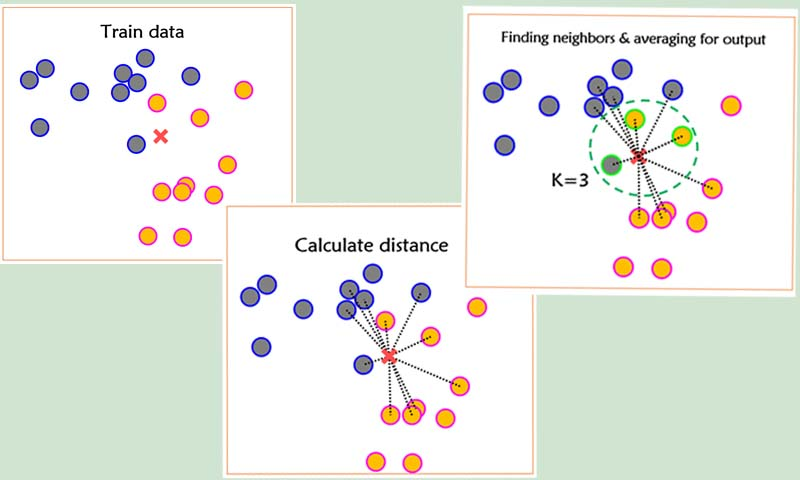

In [74]:
from sklearn.neighbors import KNeighborsRegressor

knn20 = KNeighborsRegressor(n_neighbors=20)
knn20.fit(X_train, y_train)
y_pred_k20 = knn20.predict(X_test)

In [75]:
MSE_k20 = mean_squared_error(y_test, y_pred_k20)
R2_k20 = r2_score(y_test, y_pred_k20)

print(f"Mean Squared Error: {MSE_k20}")
print(f"R2 Score: {R2_k20}")

Mean Squared Error: 3374309.0026563546
R2 Score: 0.9331745716138271


#### Visualize the relationship between Temperature and Power Consumption for the test set, along with KNN regression predictions. 

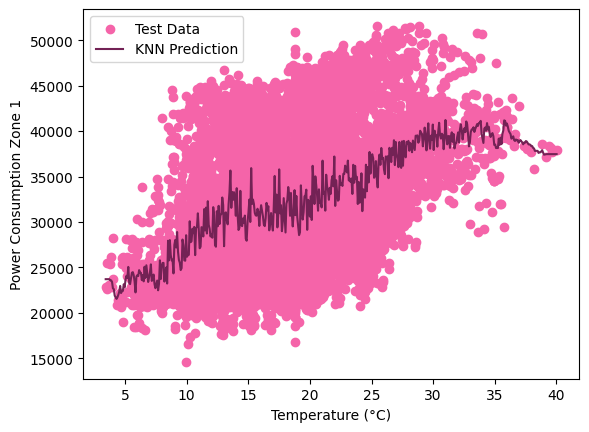

In [70]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(np.array(X_train_non['Temperature']).reshape(-1, 1), y_train)

X_range = np.linspace(X_test_non['Temperature'].min(), X_test_non['Temperature'].max(), 500).reshape(-1,1)
y_pred_range = knn.predict(X_range)
plt.scatter(X_test_non['Temperature'], y_test, color='#F564A9', label="Test Data")
plt.plot(X_range, y_pred_range, color='#732255', label="KNN Prediction")
plt.xlabel("Temperature (°C)")
plt.ylabel("Power Consumption Zone 1")
plt.legend()
plt.show()


### Find the best k

In [44]:
from sklearn.model_selection import cross_val_score

X_train_features = X_train_non.columns
y_train = y_train

k_values = range(1, 21)
cv_rmse = []
cv_mae = []
cv_r2 = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # RMSE
    scores_rmse = cross_val_score(knn, X_train_features, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cv_rmse.append(-scores_rmse.mean())
    
    # MAE
    scores_mae = cross_val_score(knn, X_train_features, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_mae.append(-scores_mae.mean())
    
    # R2
    scores_r2 = cross_val_score(knn, X_train_features, y_train, cv=5, scoring='r2')
    cv_r2.append(scores_r2.mean())

best_k_rmse = k_values[np.argmin(cv_rmse)]
best_k_mae = k_values[np.argmin(cv_mae)]
best_k_r2 = k_values[np.argmax(cv_r2)]

print(f"Best k for RMSE: {best_k_rmse}")
print(f"Best k for MAE: {best_k_mae}")
print(f"Best k for R2: {best_k_r2}")

Best k for RMSE: 2
Best k for MAE: 1
Best k for R2: 2


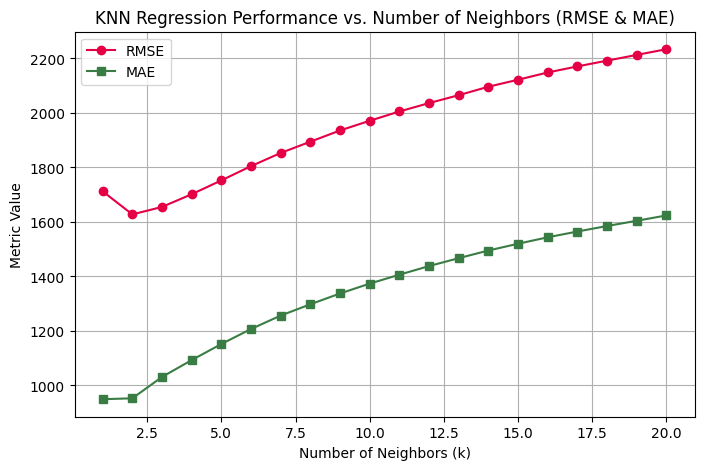

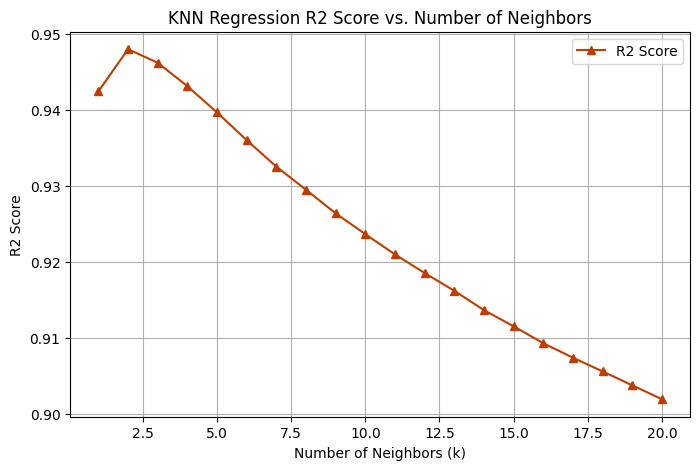

In [46]:
# Plot RMSE and MAE
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_rmse, marker='o', label='RMSE' , color='#E50046')
plt.plot(k_values, cv_mae, marker='s', label='MAE' , color='#3A7D44')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metric Value')
plt.title('KNN Regression Performance vs. Number of Neighbors (RMSE & MAE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot R2
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_r2, marker='^', label='R2 Score' , color='#BB3E00')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R2 Score')
plt.title('KNN Regression R2 Score vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

###  Fit the KNN model using the optimal k ==> k = 2

In [76]:
knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(X_train, y_train)
y_pred_k2 = knn2.predict(X_test)

MSE_k2 = mean_squared_error(y_test, y_pred_k2)
R2_k2 = r2_score(y_test, y_pred_k2)
print(f"Mean Squared Error: {MSE_k2}")
print(f"R2 Score: {R2_k2}")

Mean Squared Error: 1193924.7015240802
R2 Score: 0.9763552983507522


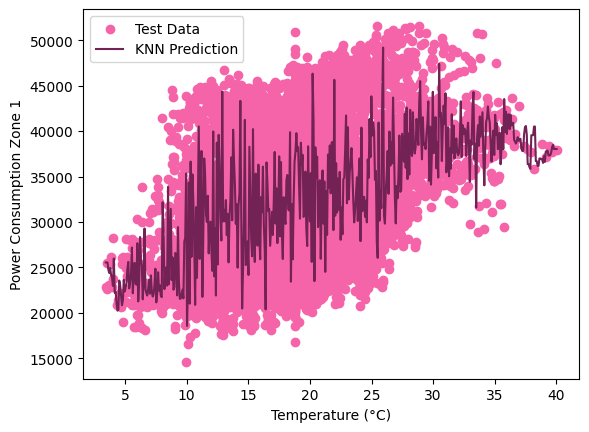

In [58]:
knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(np.array(X_train_non['Temperature']).reshape(-1, 1), y_train)

X_range = np.linspace(X_test_non['Temperature'].min(), X_test_non['Temperature'].max(), 500).reshape(-1,1)
y_pred_range = knn2.predict(X_range)
plt.scatter(X_test_non['Temperature'], y_test, color='#F564A9', label="Test Data")
plt.plot(X_range, y_pred_range, color='#732255', label="KNN Prediction")
plt.xlabel("Temperature (°C)")
plt.ylabel("Power Consumption Zone 1")
plt.legend()
plt.show()



## 3.3. Decision Tree Regression
- Splits data into regions to predict target values.

---

In [118]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=2, random_state=2)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [119]:
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R^2:", r2_score(y_test, y_pred_dt))

MSE: 13168426.394828683
R^2: 0.7392100918103638


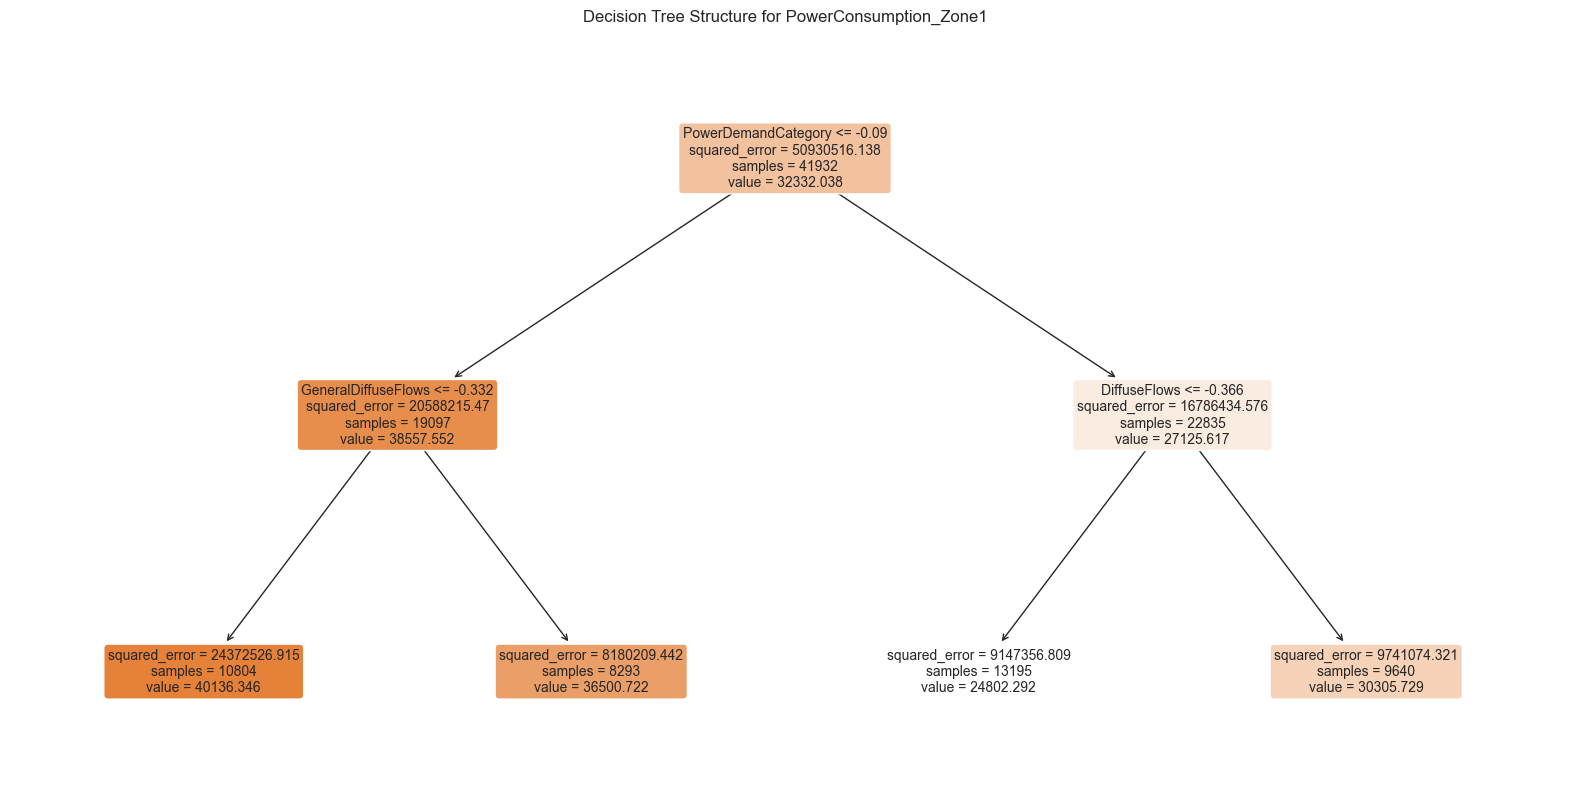

In [120]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X_train_non.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure for PowerConsumption_Zone1")
plt.show()


# 4. Model Evaluation Metrics
- **Mean Squared Error (MSE):** average squared difference between predicted and actual.
- **Root Mean Squared Error (RMSE):** square root of MSE.
- **R² Score:** proportion of variance explained by the model.

---

|                       | **MSE**                      | **R² Score**              |
| --------------------- | ---------------------------- | ------------------------- |
| **Decision Tree**     | 13,168,426                   | 0.739                     |
| **KNN**               | 17,171,732                   | 0.660                     |
| **Linear Regression** | 17,171,732                   | 0.660                     |


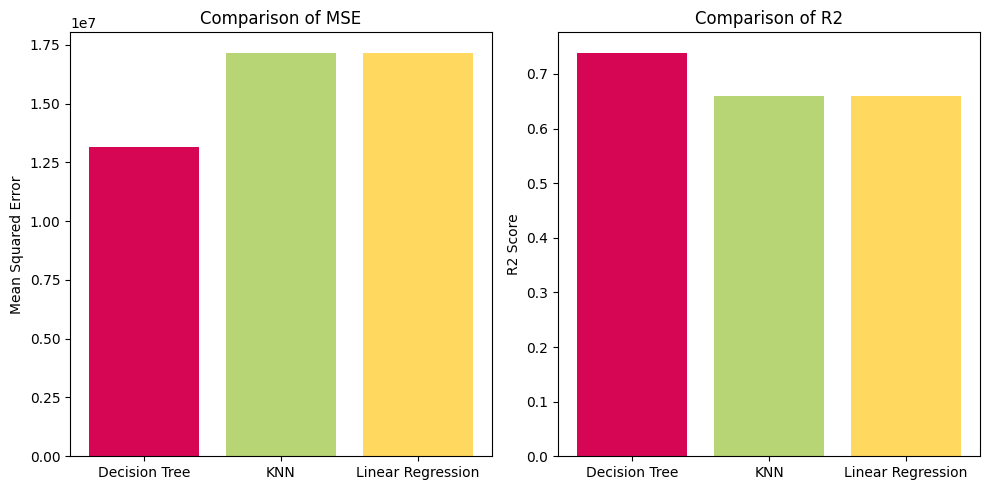

In [77]:

models = ['Decision Tree', 'KNN', 'Linear Regression']
mse_values = [13168426.394828683, 17171732.58240223, 17171732.58240223]
r2_values = [0.7392100918103638, 0.6599278889252642, 0.6599278889252642]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['#D70654', '#B8D576', '#FFD95F'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['#D70654', '#B8D576', '#FFD95F'])
plt.ylabel('R2 Score')
plt.title('Comparison of R2')

plt.tight_layout()
plt.show()

## Summary
- Regression predicts continuous outputs.
- Linear Regression fits a linear model.
- KNN Regression averages nearby points.
- Decision Trees split data for prediction.
- Evaluate with MSE, RMSE, and R².
- Visualization helps assess model performance.

Next steps: try more models and tune hyperparameters.